In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.isnull()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Verify encoding
print(df.head())


   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     3   9839.64  C1231006815       170136.0       160296.36   
1     1     3   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     3  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [8]:
# Exclude 'nameOrig' and 'nameDest' from the numerical columns
numerical_columns = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Fill missing values with the median for numerical columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Verify no missing values in numerical columns
print(df[numerical_columns].isnull().sum())


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [9]:
from scipy import stats
import numpy as np

# Remove outliers
df = df[(np.abs(stats.zscore(df[numerical_columns])) < 3).all(axis=1)]

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(df[numerical_columns].values, i) for i in range(len(numerical_columns))]

# Display VIF data
print(vif_data)


          feature         VIF
0            step    2.498687
1            type    2.297852
2          amount    3.647275
3   oldbalanceOrg  380.302563
4  newbalanceOrig  393.756392
5  oldbalanceDest  124.805548
6  newbalanceDest  136.536510


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print(df.describe())



               step          type        amount  oldbalanceOrg  \
count  6.025952e+06  6.025952e+06  6.025952e+06   6.025952e+06   
mean   2.381542e+02  1.747077e+00  1.450087e+05   4.546267e+05   
std    1.354733e+02  1.328359e+00  2.139502e+05   1.426876e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.550000e+02  1.000000e+00  1.269073e+04   0.000000e+00   
50%    2.360000e+02  1.000000e+00  6.933972e+04   1.202400e+04   
75%    3.320000e+02  3.000000e+00  2.026841e+05   9.904607e+04   
max    6.700000e+02  4.000000e+00  1.991430e+06   9.498553e+06   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  \
count    6.025952e+06    6.025952e+06    6.025952e+06  6.025952e+06   
mean     4.740211e+05    8.185296e+05    9.079829e+05  9.714648e-04   
std      1.468050e+06    1.630536e+06    1.696180e+06  3.115319e-02   
min      0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
25%      0.000000e+00    0.000000e+00    0.000000e

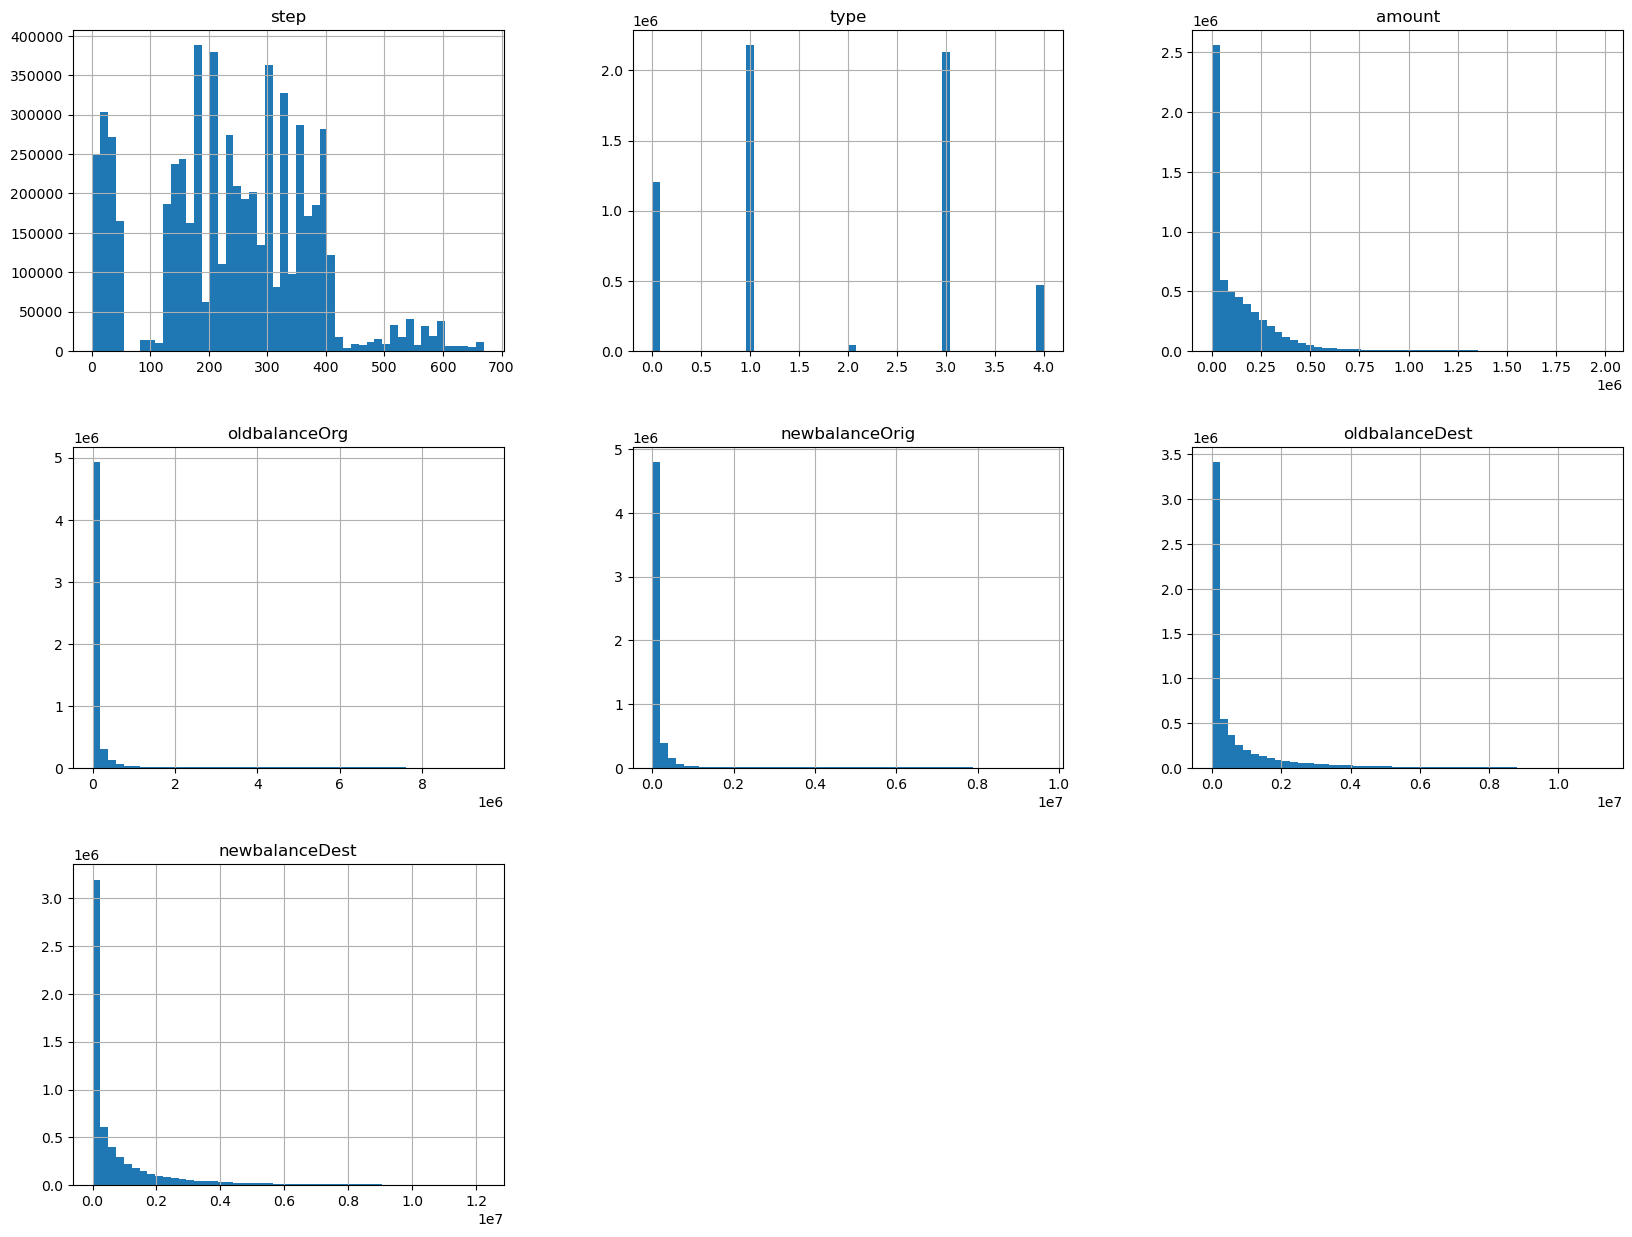

In [12]:
# Histograms for numerical features
df[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.show()

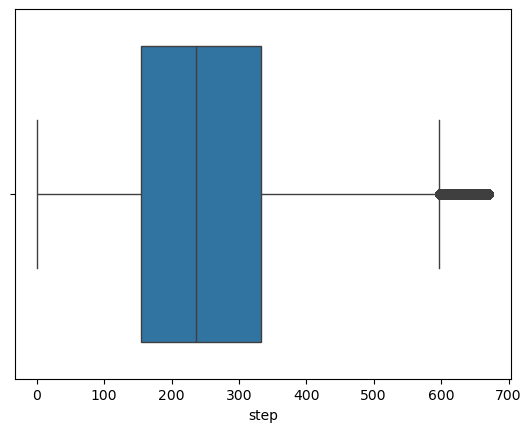

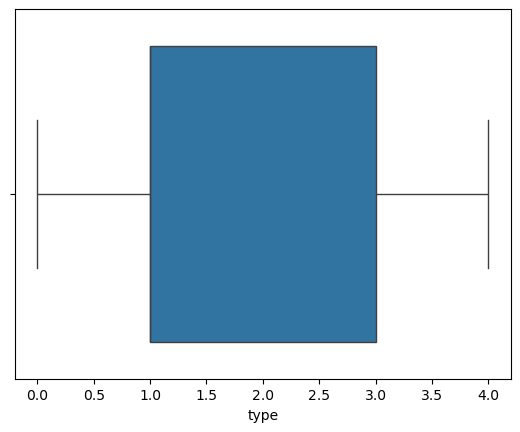

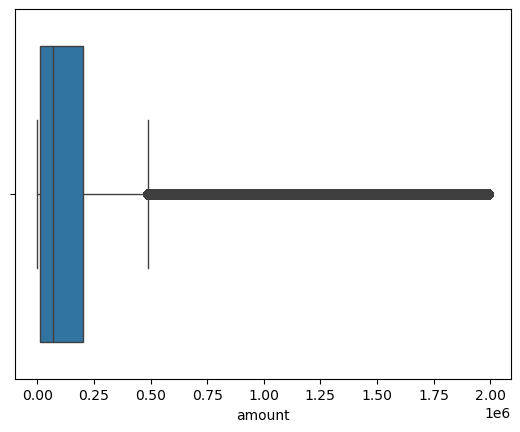

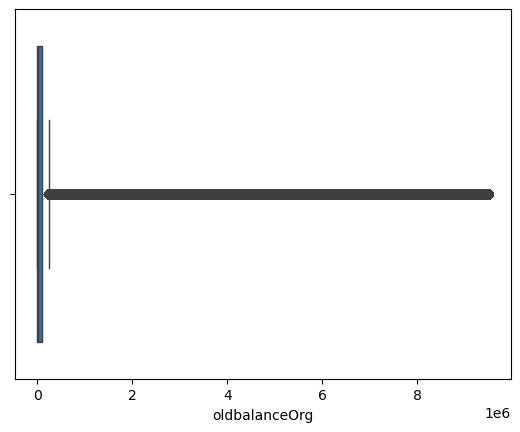

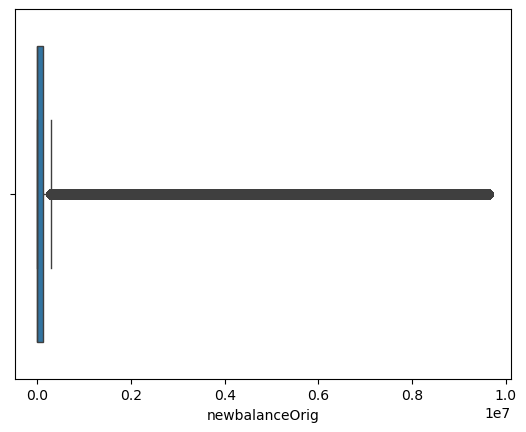

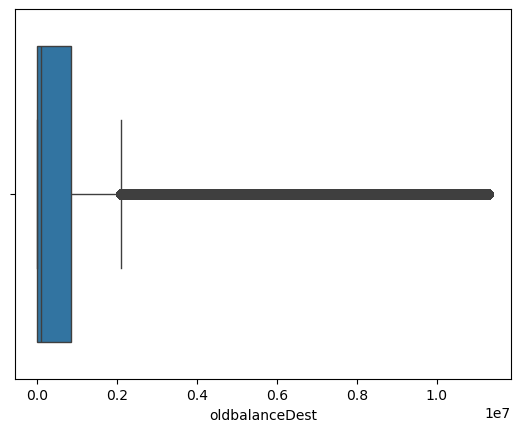

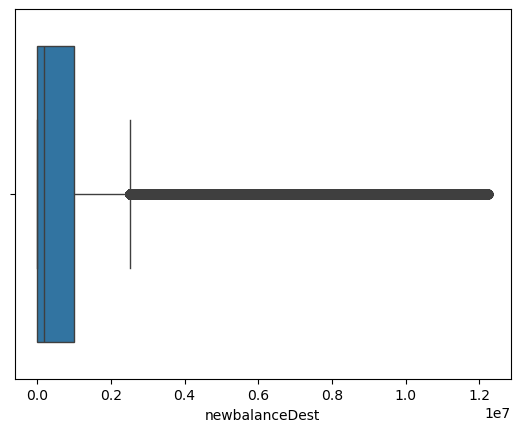

In [13]:
# Box plots for numerical features
for feature in numerical_columns:
    sns.boxplot(x=df[feature])
    plt.show()

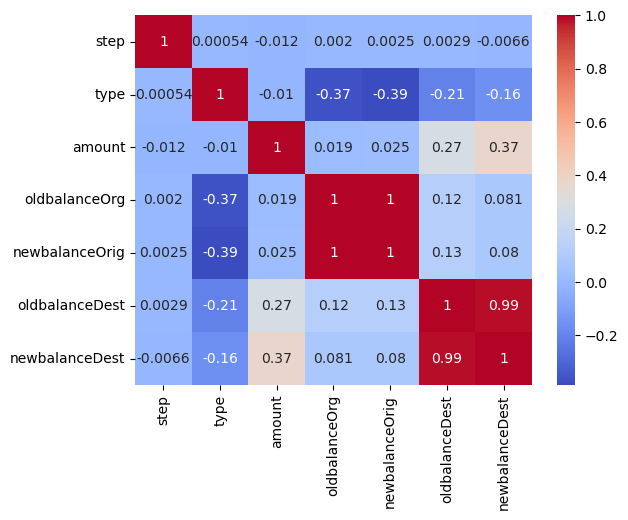

In [14]:
# Correlation matrix (exclude non-numeric columns)
numeric_data = df[numerical_columns]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Splitting the Dataset into X and Y

In [16]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Check for missing values in the target variable
print(y.isnull().sum())

# Drop rows where the target variable is NaN
df = df.dropna(subset=['isFraud'])

# Re-define features and target after dropping rows with NaN in the target
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in the split data
print(y_train.isnull().sum())
print(y_test.isnull().sum())


0
0
0


# Train the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

In [ ]:
# Print best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]


In [ ]:
# Performance metrics
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()